In [ ]:
import pandas as pd
from scipy import stats as st
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.stats.stattools import durbin_watson as DW


rpy2.robjects.numpy2ri.activate()
stats = importr('stats')

In [ ]:
df = pd.read_csv("data.csv",usecols=["EmploymentField",
"EmploymentStatus", "Gender", "JobPref", "JobWherePref", "MaritalStatus", "Income"])
df.Income = pd.to_numeric(df.Income)

In [ ]:
df = df[df["Gender"].isin(["male","female"])]

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.dtypes

,0
EmploymentField,object
EmploymentStatus,object
Gender,object
Income,float64
JobPref,object
JobWherePref,object
MaritalStatus,object


In [ ]:
r = pd.crosstab(df.Gender,df.JobPref, margins=False)
st.contingency.expected_freq(r)


array([[ 73.80628272,  20.28010471,  32.91361257],
       [370.19371728, 101.71989529, 165.08638743]])

In [ ]:
st.contingency.chi2_contingency(r,correction=False)

Chi2ContingencyResult(statistic=2.9296663743177596, pvalue=0.2311165414688363, dof=2, expected_freq=array([[ 73.80628272,  20.28010471,  32.91361257],
       [370.19371728, 101.71989529, 165.08638743]]))

In [ ]:
r = pd.crosstab(df.Gender,df.JobWherePref, margins=False)
st.contingency.expected_freq(r)

array([[ 31.08507853,  62.17015707,  33.7447644 ],
       [155.91492147, 311.82984293, 169.2552356 ]])

In [ ]:
st.contingency.chi2_contingency(r,correction=False)

Chi2ContingencyResult(statistic=2.468792878230615, pvalue=0.29101035183846335, dof=2, expected_freq=array([[ 31.08507853,  62.17015707,  33.7447644 ],
       [155.91492147, 311.82984293, 169.2552356 ]]))

In [ ]:
r= pd.crosstab(df.JobWherePref,df.MaritalStatus, margins=False)
st.contingency.expected_freq(r)

array([[  9.05628272, 145.14528796,   1.95811518,  30.84031414],
       [ 18.11256545, 290.29057592,   3.91623037,  61.68062827],
       [  9.83115183, 157.56413613,   2.12565445,  33.47905759]])

In [ ]:
m = np.array(r.values)
res = stats.fisher_test(m, simulate_p_value = False)
print(res)


	Fisher's Exact Test for Count Data

data:  structure(c(12L, 14L, 11L, 153L, 291L, 149L, 2L, 2L, 4L, 20L, 67L, 39L), dim = 3:4)
p-value = 0.06912
alternative hypothesis: two.sided




In [ ]:
r = pd.crosstab(df.EmploymentField,df.JobWherePref, margins=False)
st.contingency.expected_freq(r)

array([[  6.60863874,  13.21727749,   7.17408377],
       [ 11.9934555 ,  23.98691099,  13.01963351],
       [  3.91623037,   7.83246073,   4.2513089 ],
       [ 24.72120419,  49.44240838,  26.83638743],
       [  0.73429319,   1.46858639,   0.79712042],
       [ 10.52486911,  21.04973822,  11.42539267],
       [  7.83246073,  15.66492147,   8.5026178 ],
       [ 10.28010471,  20.56020942,  11.15968586],
       [  1.71335079,   3.42670157,   1.85994764],
       [  1.71335079,   3.42670157,   1.85994764],
       [ 17.13350785,  34.26701571,  18.59947644],
       [ 11.9934555 ,  23.98691099,  13.01963351],
       [  0.97905759,   1.95811518,   1.06282723],
       [ 71.96073298, 143.92146597,  78.11780105],
       [  4.89528796,   9.79057592,   5.31413613]])

In [ ]:
m = np.array(r.values)
res = stats.fisher_test(m, simulate_p_value = True)
print(res)


	Fisher's Exact Test for Count Data with simulated p-value (based on
	2000 replicates)

data:  structure(c(8L, 17L, 1L, 29L, 1L, 8L, 9L, 10L, 1L, 2L, 14L, 11L, 0L, 69L, 7L, 15L, 25L, 11L, 46L, 1L, 27L, 13L, 18L, 4L, 3L, 33L, 22L, 4L, 143L, 9L, 4L, 7L, 4L, 26L, 1L, 8L, 10L, 14L, 2L, 2L, 23L, 16L, 0L, 82L, 4L), dim = c(15L, 3L))
p-value = 0.5862
alternative hypothesis: two.sided




In [ ]:
r = pd.crosstab(df.EmploymentStatus,df.JobWherePref, margins=False)
st.contingency.expected_freq(r)

array([[166.68455497, 333.36910995, 180.94633508],
       [  4.65052356,   9.30104712,   5.04842932],
       [ 15.66492147,  31.32984293,  17.0052356 ]])

In [ ]:
m = np.array(r.values)
res = stats.fisher_test(m, simulate_p_value = True)
print(res)


	Fisher's Exact Test for Count Data with simulated p-value (based on
	2000 replicates)

data:  structure(c(164L, 5L, 18L, 330L, 10L, 34L, 187L, 4L, 12L), dim = c(3L, 3L))
p-value = 0.6222
alternative hypothesis: two.sided




array([  6000.        ,  70666.66666667, 135333.33333333, 200000.        ])

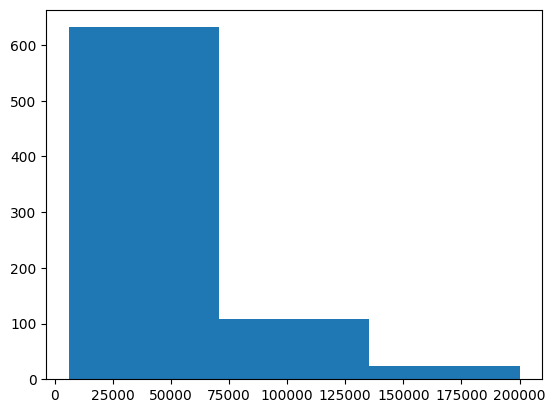

In [ ]:
plt.hist(df["Income"],bins=3)[1]

In [ ]:
def categorize(income):
  r = []
  for i in income:
    if(i <= 70667):
      r.append("Low")
    elif (70667 < i <= 135333):
      r.append("Mediun")
    else:
      r.append("High")
  return r

In [ ]:
df["IncomeCat"] = categorize(df["Income"].tolist())

In [ ]:
df

,EmploymentField,EmploymentStatus,Gender,Income,JobPref,JobWherePref,MaritalStatus,IncomeCat
59,software development,Employed for wages,male,35000.0,work for a medium-sized company,in an office with other developers,married or domestic partnership,Low
71,education,Employed for wages,male,56000.0,work for a multinational corporation,from home,married or domestic partnership,Low
72,transportation,Employed for wages,male,35000.0,work for a medium-sized company,from home,married or domestic partnership,Low
77,"arts, entertainment, sports, or media",Employed for wages,male,65000.0,work for a medium-sized company,from home,married or domestic partnership,Low
90,sales,Employed for wages,male,30000.0,work for a startup,in an office with other developers,"single, never married",Low
...,...,...,...,...,...,...,...,...
15564,finance,Employed for wages,male,200000.0,work for a medium-sized company,in an office with other developers,married or domestic partnership,High
15566,finance,Employed for wages,male,200000.0,work for a startup,no preference,married or domestic partnership,High
15584,software development and IT,Employed for wages,male,200000.0,work for a multinational corporation,in an office with other developers,married or domestic partnership,High
15598,food and beverage,Employed for wages,male,200000.0,work for a medium-sized company,from home,married or domestic partnership,High


In [ ]:
r = pd.crosstab(df.Gender,df.IncomeCat)
st.contingency.expected_freq(r)

array([[  3.82329843, 105.05759162,  18.11910995],
       [ 19.17670157, 526.94240838,  90.88089005]])

In [ ]:
m = np.array(r.values)
res = stats.fisher_test(m, simulate_p_value = True)
print(res)


	Fisher's Exact Test for Count Data with simulated p-value (based on
	2000 replicates)

data:  structure(c(2L, 21L, 106L, 526L, 19L, 90L), dim = 2:3)
p-value = 0.6357
alternative hypothesis: two.sided




In [ ]:
df.dtypes

,0
EmploymentField,object
EmploymentStatus,object
Gender,object
Income,float64
JobPref,object
JobWherePref,object
MaritalStatus,object
IncomeCat,object


In [ ]:
df.dtypes

,0
EmploymentField,object
EmploymentStatus,object
Gender,object
Income,float64
JobPref,object
JobWherePref,object
MaritalStatus,object
IncomeCat,object


In [ ]:
st.shapiro(df["Income"])

ShapiroResult(statistic=0.8474842624680363, pvalue=1.796915165737898e-26)

In [ ]:
df["Income"] = df["Income"].apply(lambda x: np.log(x + 1))

In [ ]:
st.shapiro(df["Income"])

ShapiroResult(statistic=0.9698330003215974, pvalue=1.8691133308568428e-11)

In [ ]:
df=df.head(100)
df.shape

(100, 8)

In [162]:
iter = []
for field in df.EmploymentField.unique().tolist():
  iter.append(df[df["EmploymentField"] == field]["Income"])

print(st.f_oneway(*iter))
print(st.levene(*iter))

print("-"*100)
for obj in zip(df.EmploymentField.unique().tolist(),iter):
  print(f"{obj[0]}\t{DW(obj[1])}")

F_onewayResult(statistic=1.4306061716403498, pvalue=0.17355924689038063)
LeveneResult(statistic=0.611959824288202, pvalue=0.8140749167408166)
----------------------------------------------------------------------------------------------------
software development	0.0031781060626244516
education	0.004357632321418601
transportation	0.024319022030917504
arts, entertainment, sports, or media	0.0044436197782824535
sales	0.0026094389579942533
office and administrative support	0.0038163049381611026
food and beverage	0.010808936431206407
construction and extraction	0.0038282258790262812
health care	0.007478835811862949
software development and IT	0.005798534361133846
finance	0.007488521783990054
architecture or physical engineering	0.014178186995560142


In [163]:
iter = []
for field in df.EmploymentStatus.unique().tolist():
  iter.append(df[df["EmploymentStatus"] == field]["Income"])

print(st.f_oneway(*iter))
print(st.levene(*iter))


print("-"*100)
for obj in zip(df.EmploymentStatus.unique().tolist(),iter):
  print(f"{obj[0]}\t{DW(obj[1])}")

F_onewayResult(statistic=3.0033854516387364, pvalue=0.05425491954591807)
LeveneResult(statistic=0.9005831879280195, pvalue=0.4097025244218172)
----------------------------------------------------------------------------------------------------
Employed for wages	0.006166259999038568
Self-employed business owner	0.004807367960808007
Self-employed freelancer	0.010889228955058514


In [164]:
iter = []
for field in df.Gender.unique().tolist():
  iter.append(df[df["Gender"] == field]["Income"])

print(st.f_oneway(*iter))
print(st.levene(*iter))

print("-"*100)
for obj in zip(df.Gender.unique().tolist(),iter):
  print(f"{obj[0]}\t{DW(obj[1])}")

F_onewayResult(statistic=0.017963713279762376, pvalue=0.8936546807735013)
LeveneResult(statistic=0.004221377766022378, pvalue=0.9483285419944949)
----------------------------------------------------------------------------------------------------
male	0.007925248517379089
female	0.007462200926571301


In [165]:
iter = []
for field in df.JobPref.unique().tolist():
  iter.append(df[df["JobPref"] == field]["Income"])

print(st.f_oneway(*iter))
print(st.levene(*iter))

print("-"*100)
for obj in zip(df.JobPref.unique().tolist(),iter):
  print(f"{obj[0]}\t{DW(obj[1])}")

F_onewayResult(statistic=1.981219480385858, pvalue=0.1434422852531389)
LeveneResult(statistic=0.1653965020602979, pvalue=0.8477960993791913)
----------------------------------------------------------------------------------------------------
work for a medium-sized company	0.006763449514854692
work for a multinational corporation	0.004465262457876931
work for a startup	0.005569414507392579


In [166]:
iter = []
for field in df.JobWherePref.unique().tolist():
  iter.append(df[df["JobWherePref"] == field]["Income"])

print(st.f_oneway(*iter))
print(st.levene(*iter))

print("-"*100)
for obj in zip(df.JobWherePref.unique().tolist(),iter):
  print(f"{obj[0]}\t{DW(obj[1])}")

F_onewayResult(statistic=0.5402353815907167, pvalue=0.5843537560719639)
LeveneResult(statistic=0.7237741563530007, pvalue=0.48751862453099026)
----------------------------------------------------------------------------------------------------
in an office with other developers	0.007697861464515756
from home	0.0032739069193340633
no preference	0.00601926090651567


In [167]:
iter = []
for field in df.MaritalStatus.unique().tolist():
  iter.append(df[df["MaritalStatus"] == field]["Income"])

print(st.f_oneway(*iter))
print(st.levene(*iter))

print("-"*100)
for obj in zip(df.MaritalStatus.unique().tolist(),iter):
  print(f"{obj[0]}\t{DW(obj[1])}")

F_onewayResult(statistic=0.14641958341341219, pvalue=0.8639857444708781)
LeveneResult(statistic=1.4118440959141736, pvalue=0.24865599992108622)
----------------------------------------------------------------------------------------------------
married or domestic partnership	0.007532796375560591
single, never married	0.008039645757201614
divorced	0.0010559122551128202
